In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
import seaborn as sns
from random import randint
from tensorflow.keras.preprocessing import image
from contextlib import suppress
import tensorflow as tf
from tensorflow.keras import Input, Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D,AveragePooling2D, Conv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121, DenseNet201, ResNet50, VGG19, InceptionV3, EfficientNetB7
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.metrics import AUC
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils


# path to images
path = 'C:/Users/parvb/Downloads/output (1)/output/'

# watch categories
categories = ['Breitling', 'Casio','Gucci','Rolex','Seiko']

In [6]:
img_height = 180
img_width = 180
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_1 = ImageDataGenerator(rotation_range=40,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       vertical_flip=False,
                                       rescale=1/255.0,
                                       validation_split=0.2)
testgen_1 = ImageDataGenerator(rescale=1/255.0) 



train_data_gen = datagen_1.flow_from_directory('C:/Users/parvb/Downloads/Sameer_Harsh/output/train',
                                                        target_size=(img_height, img_width),
                                                        batch_size=32,
                                                        shuffle=True,seed=42,
                                                        class_mode='categorical',subset='training') 
val_data_gen = datagen_1.flow_from_directory('C:/Users/parvb/Downloads/Sameer_Harsh/output/val',
                                                        target_size=(img_height, img_width),
                                                        batch_size=32,
                                                        shuffle=True,seed=42,
                                                        class_mode='categorical',subset='validation') 
scale_test_gen = datagen_1.flow_from_directory('C:/Users/parvb/Downloads/Sameer_Harsh/output/test',#directory
                                                        target_size=(180,180),#All images will be resized to 180x180,
                                                        batch_size=1400,
                                                        shuffle=True,
                                                        class_mode='categorical') 

Found 8469 images belonging to 5 classes.
Found 261 images belonging to 5 classes.
Found 1326 images belonging to 5 classes.


## Custom model watch classification results

In [4]:
with tf.device('/CPU:0'):
    custom_model = tf.keras.models.load_model('custom_model_watches.h5')
    custom_model.evaluate(scale_test_gen)

3/3 [==============================] - 17s 3s/step - loss: 0.5920 - acc: 0.7903 - auc: 0.9562


In [7]:
test_data,test_labels = scale_test_gen.next()


              precision    recall  f1-score   support

   Breitling       0.80      0.75      0.77       263
       Casio       0.78      0.82      0.80       265
       Gucci       0.75      0.83      0.79       263
       Rolex       0.85      0.83      0.84       271
       Seiko       0.76      0.70      0.73       264

   micro avg       0.79      0.79      0.79      1326
   macro avg       0.79      0.79      0.79      1326
weighted avg       0.79      0.79      0.79      1326
 samples avg       0.79      0.79      0.79      1326



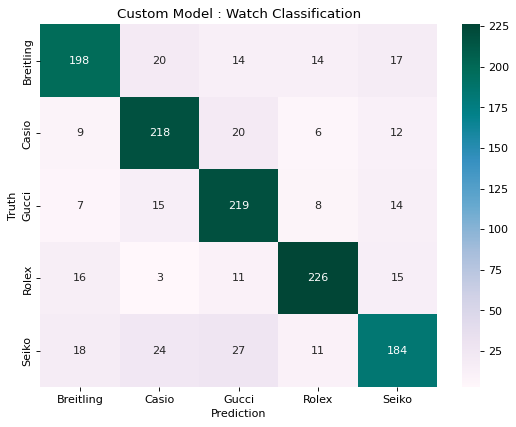

In [11]:
#load model

pred_lab = custom_model.predict(test_data)

# Classification report block
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_lab:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_lab, target_names=categories))

# Confussion Matrix block
pred_ls = np.argmax(pred_lab, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='PuBuGn', annot=True, fmt='d', xticklabels= categories,
                yticklabels=categories)

plt.title('Custom Model : Watch Classification')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

## InceptionV3 Transfer Learning watch classification results

In [9]:
with tf.device('/CPU:0'):
    INV3_model = tf.keras.models.load_model('InceptionV3_model_watches_classification.h5')
    INV3_model.evaluate(scale_test_gen)

1/1 [==============================] - 21s 21s/step - loss: 0.4215 - acc: 0.8846 - auc: 0.9781


              precision    recall  f1-score   support

   Breitling       0.87      0.91      0.89       263
       Casio       0.89      0.95      0.92       265
       Gucci       0.87      0.89      0.88       263
       Rolex       0.92      0.85      0.88       271
       Seiko       0.87      0.81      0.84       264

   micro avg       0.88      0.88      0.88      1326
   macro avg       0.88      0.88      0.88      1326
weighted avg       0.88      0.88      0.88      1326
 samples avg       0.88      0.88      0.88      1326



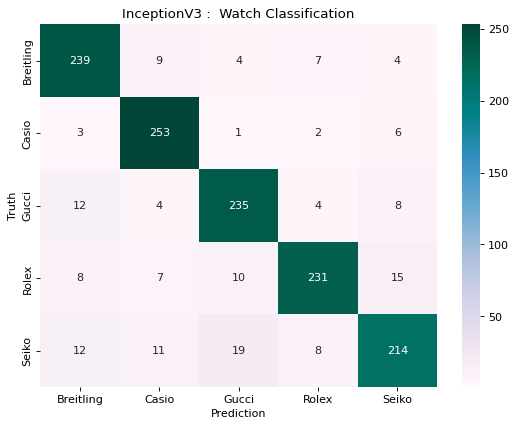

In [12]:
#load model

pred_lab = INV3_model.predict(test_data)

# Classification report block
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_lab:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_lab, target_names=categories))

# Confussion Matrix block
pred_ls = np.argmax(pred_lab, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='PuBuGn', annot=True, fmt='d', xticklabels= categories,
                yticklabels=categories)

plt.title('InceptionV3 :  Watch Classification')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [13]:
with tf.device('/CPU:0'):
    DNET_model = tf.keras.models.load_model('DenseNet201_model_watches_classification.h5')
    DNET_model.evaluate(scale_test_gen)

1/1 [==============================] - 57s 57s/step - loss: 0.6903 - acc: 0.8816 - auc: 0.9658


              precision    recall  f1-score   support

   Breitling       0.87      0.89      0.88       263
       Casio       0.94      0.92      0.93       265
       Gucci       0.88      0.85      0.87       263
       Rolex       0.91      0.91      0.91       271
       Seiko       0.81      0.83      0.82       264

   micro avg       0.88      0.88      0.88      1326
   macro avg       0.88      0.88      0.88      1326
weighted avg       0.88      0.88      0.88      1326
 samples avg       0.88      0.88      0.88      1326



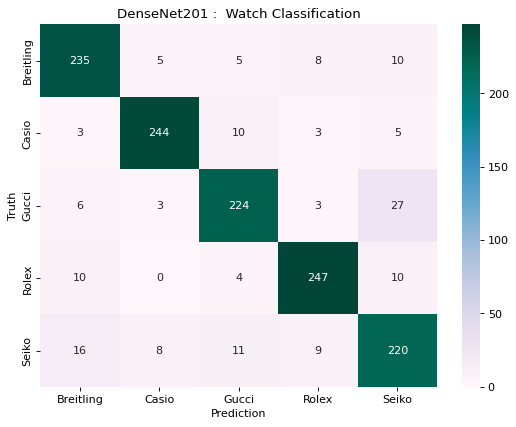

In [14]:
#load model

pred_lab = DNET_model.predict(test_data)

# Classification report block
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_lab:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_lab, target_names=categories))

# Confussion Matrix block
pred_ls = np.argmax(pred_lab, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='PuBuGn', annot=True, fmt='d', xticklabels= categories,
                yticklabels=categories)

plt.title('DenseNet201 :  Watch Classification')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)